In [25]:
import numpy as np
import pandas as pd 
import streamlit as st
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import auc, roc_curve

In [3]:
dataset=pd.read_csv('Dataset.csv')
dataset

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
0,5.0,67.0,lobular,spiculated,low,1
1,4.0,43.0,round,circumscribed,NaN,1
2,5.0,58.0,irregular,spiculated,low,1
3,4.0,28.0,round,circumscribed,low,0
4,5.0,74.0,round,spiculated,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,oval,circumscribed,low,0
957,4.0,56.0,irregular,spiculated,low,1
958,4.0,64.0,irregular,spiculated,low,0
959,5.0,66.0,irregular,spiculated,low,1


In [15]:
st.dataframe(dataset)

<AxesSubplot:xlabel='Margin'>

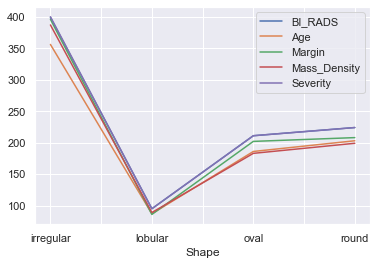

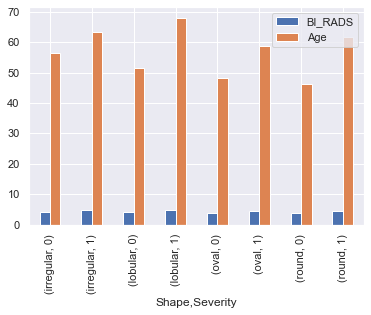

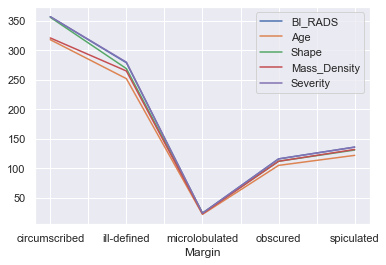

In [4]:
# print(dataset['Mass_Density'].unique())
# print(dataset['Shape'].unique())
# print(dataset['Margin'].unique())
mass_density_group=dataset.groupby(["Shape","Severity"]).mean()
mass_density_group.plot.bar()
shape_count=dataset.groupby("Shape").count()
shape_count.plot()
margin_count=dataset.groupby("Margin").count()
margin_count.plot()

In [19]:
##label encoder looses data priority 
dataset["Mass_Density"]=dataset["Mass_Density"].fillna('medium')
dataset["Shape"]=dataset["Shape"].fillna('irregular')
dataset["Margin"]=dataset["Margin"].fillna('circumscribed')
print(dataset)

     BI_RADS   Age      Shape         Margin Mass_Density  Severity
0        5.0  67.0    lobular     spiculated          low         1
1        4.0  43.0      round  circumscribed       medium         1
2        5.0  58.0  irregular     spiculated          low         1
3        4.0  28.0      round  circumscribed          low         0
4        5.0  74.0      round     spiculated       medium         1
..       ...   ...        ...            ...          ...       ...
956      4.0  47.0       oval  circumscribed          low         0
957      4.0  56.0  irregular     spiculated          low         1
958      4.0  64.0  irregular     spiculated          low         0
959      5.0  66.0  irregular     spiculated          low         1
960      4.0  62.0    lobular       obscured          low         0

[961 rows x 6 columns]


In [13]:
dataset=dataset.fillna(0)
clean_dataset=pd.get_dummies(dataset,columns=['Margin','Mass_Density','Shape'])
clean_dataset


,BI_RADS,Age,Severity,Margin_0,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_0,Mass_Density_fat-containing,Mass_Density_high,Mass_Density_iso,Mass_Density_low,Shape_0,Shape_irregular,Shape_lobular,Shape_oval,Shape_round
0,5.0,67.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,4.0,43.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,5.0,58.0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
3,4.0,28.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5.0,74.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,4.0,47.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
957,4.0,56.0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
958,4.0,64.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
959,5.0,66.0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [14]:
###
age=st.sidebar.slider('Age',20,40,60,2)
user_data={'Age':age}
feature=pd.DataFrame(user_data,index=[0])
st.subheader('user input:')
st.write(user_data)

In [15]:
X=clean_dataset
y=clean_dataset.pop('Severity')
feature_name=X.columns.values
print(feature_name)

['BI_RADS' 'Age' 'Margin_0' 'Margin_circumscribed' 'Margin_ill-defined'
 'Margin_microlobulated' 'Margin_obscured' 'Margin_spiculated'
 'Mass_Density_0' 'Mass_Density_fat-containing' 'Mass_Density_high'
 'Mass_Density_iso' 'Mass_Density_low' 'Shape_0' 'Shape_irregular'
 'Shape_lobular' 'Shape_oval' 'Shape_round']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(np.shape(X_test),np.shape(X_train))

(318, 18) (643, 18)


In [19]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print('Depth of the Decision Tree :', model.get_depth())

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Depth of the Decision Tree : 23
Target on train data [0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 

In [18]:

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(model, 
#                    feature_names=feature_name,  
#                    class_names='Severity',
#                    filled=True)

In [22]:
model = SVC()
model.fit(X_train,y_train)
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0
 1 0

In [21]:
model = GaussianNB()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
predicted = model.predict(X_test)
metrics.confusion_matrix(predicted, y_test)
model_score = model.score(X_test, y_test)
# model_score

In [35]:
y_predictProb = model.predict_proba(X_test)
print(np.shape(y_predictProb))
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

(318, 2)


0.8391808191808192

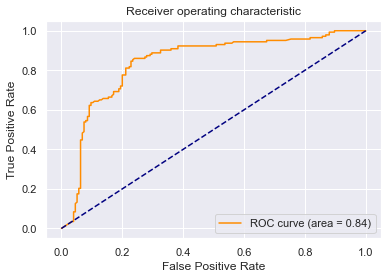

In [133]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


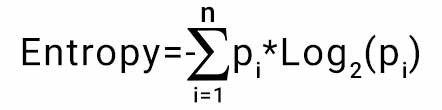

In [ ]:
shape= st.sidebar.slider('shape','a')